<a href="https://colab.research.google.com/github/yuriarciniegas/yoaprendo1/blob/master/LSA_TEST_Optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

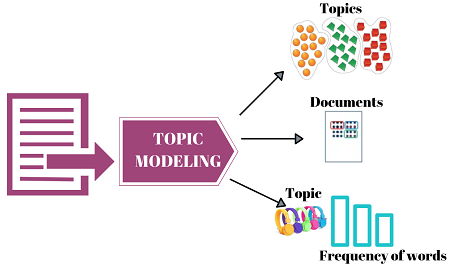

**Latent Semantic Analysis**

https://towardsdatascience.com/latent-semantic-analysis-deduce-the-hidden-topic-from-the-document-f360e8c0614b

**Step 1: Read and Organize Data**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

#LSA_TEST Data Sheet
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT_lCLl79q8KmVyVpOX4VGy-fh4J486Hz1SPd2O0YnrAnBdtslOrF1TzvIJjmOBwnm6T_Ind2rRzv_Y/pub?gid=0&single=true&output=csv")

df.head(10)


**Step 2: Document-Term Matrix**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#vec = TfidfVectorizer(smooth_idf=True)
vec = CountVectorizer()

#Tokenize and build vocabulary
vec.fit(df['Texto'])
print("\nVocabulary:\n")
print(vec.vocabulary_)

#Encode documents
trans_text_train = vec.transform(df['Texto'])

#Print Document-Term Matrix
dtm = pd.DataFrame(trans_text_train.toarray(), columns=vec.get_feature_names_out())
dtm.head()

**Step 3. Setup number of topics and words**

In [ ]:
NUM_TOPICS = 5
NUM_WORDS = 3

**Step 4. Singular Value Decomposition**

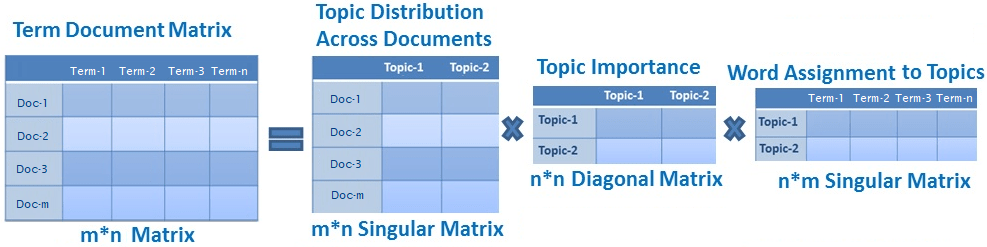

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=NUM_TOPICS, algorithm='randomized', n_iter=1000, random_state=122)

svd_model = svd_model.fit(trans_text_train)

print("\nSingular values:")
print(svd_model.singular_values_)

print("\nExplained variance by singular values:")
print(svd_model.explained_variance_ratio_.sum())

lsa = svd_model.transform(trans_text_train)

**Step 4A. SVD test**

In [ ]:
import numpy as np

U = lsa / svd_model.singular_values_
Sigma_matrix = np.diag(svd_model.singular_values_)
VT = svd_model.components_

dtmp = np.dot(U, np.dot(Sigma_matrix, VT))

np.allclose(dtm, dtmp) #This proves that dtm = U*Sigma_matrix*VT

**Step 5. Topics as Terms combination**

In [ ]:
pd.options.display.float_format = '{:,.8f}'.format

# Features or words used as features
dictionary = vec.get_feature_names_out()

topics = []
for i in range(NUM_TOPICS):
  topics.append("topic_"+str(i))

# Term-Topic matrix
encoding_matrix = pd.DataFrame(svd_model.components_, index = topics, columns = (dictionary))

encoding_matrix

In [ ]:
encoding_matrix.to_excel("VT.xlsx")

**Step 5A. Explore topics**

In [ ]:
TOPIC_TO_EXPLORE =0

encoding_matrix.iloc[TOPIC_TO_EXPLORE].sort_values(ascending=False)

**Step 6. Documents as Topics Combination**

In [ ]:
# Documents - Topic vector
pd.options.display.float_format = '{:,.8f}'.format
topic_encoded_df = pd.DataFrame(lsa, columns = topics)
topic_encoded_df["Texto"] = df["Texto"]

names = ["Texto"]
for t in topics:
  names.append(t)

display(topic_encoded_df[names])

In [ ]:
topic_encoded_df.to_excel("U_dot_Sigma.xlsx")